In [5]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('AB_NYC_2019.csv')

In [10]:
# Display the first 5 rows
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [11]:
# Get a summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
# Get descriptive statistics
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [24]:
# Create a new DataFrame without these columns
# We use .copy() to avoid SettingWithCopyWarning
df_clean = df.drop(['name', 'host_name', 'last_review'], axis=1).copy()

In [25]:
# Fill missing values in 'reviews_per_month' with 0
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)

In [26]:
# Check the info of the cleaned dataframe
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [27]:
# Check data types
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

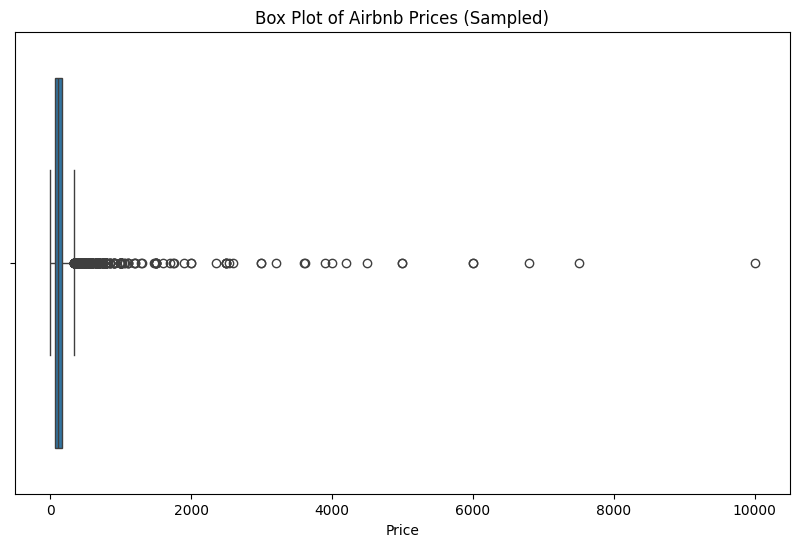

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample of 10,000 random data points from the 'price' column
# This is much faster than plotting the entire dataset
sample_size = 10000
df_sample = df_clean['price'].sample(n=sample_size, random_state=1)

# Create a box plot for the sampled data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sample)
plt.title('Box Plot of Airbnb Prices (Sampled)')
plt.xlabel('Price')
plt.show()


In [29]:
# Get descriptive statistics for the price column
print(df_clean['price'].describe())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [31]:
# Filter out rows where the price is greater than a certain threshold
df_clean = df_clean[df_clean['price'] < 1000]

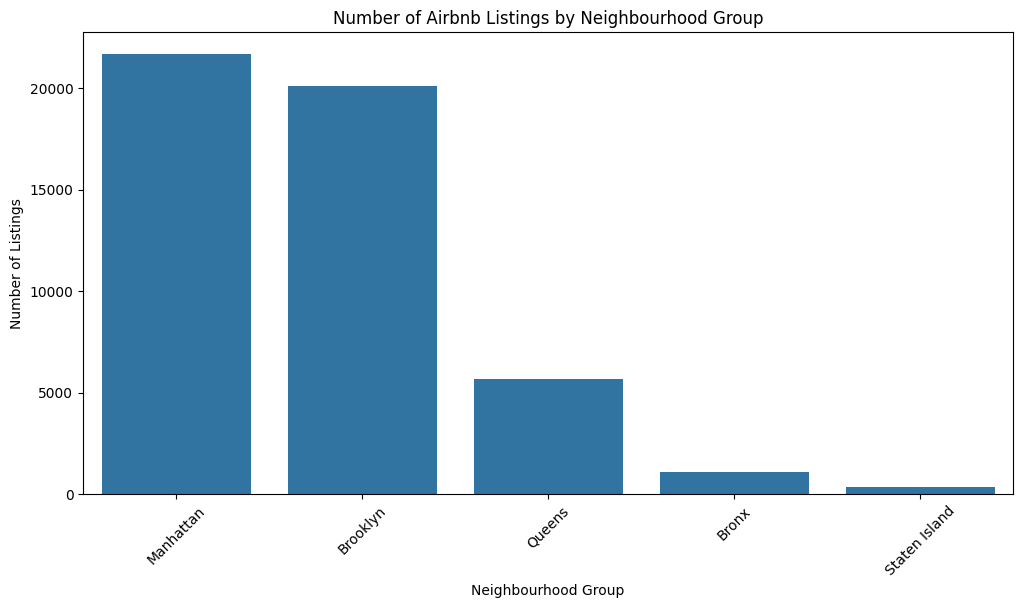

In [30]:
# Count the number of listings in each neighbourhood group
neighbourhood_counts = df_clean['neighbourhood_group'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values)
plt.title('Number of Airbnb Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45) # Rotate labels for better readability
plt.show()

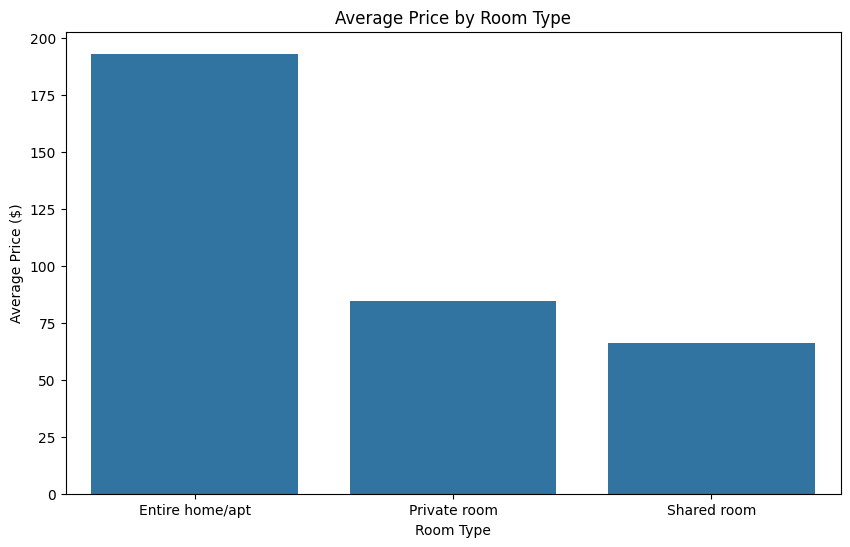

In [32]:
# Calculate the average price for each room type
price_by_room_type = df_clean.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_room_type.index, y=price_by_room_type.values)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.show()

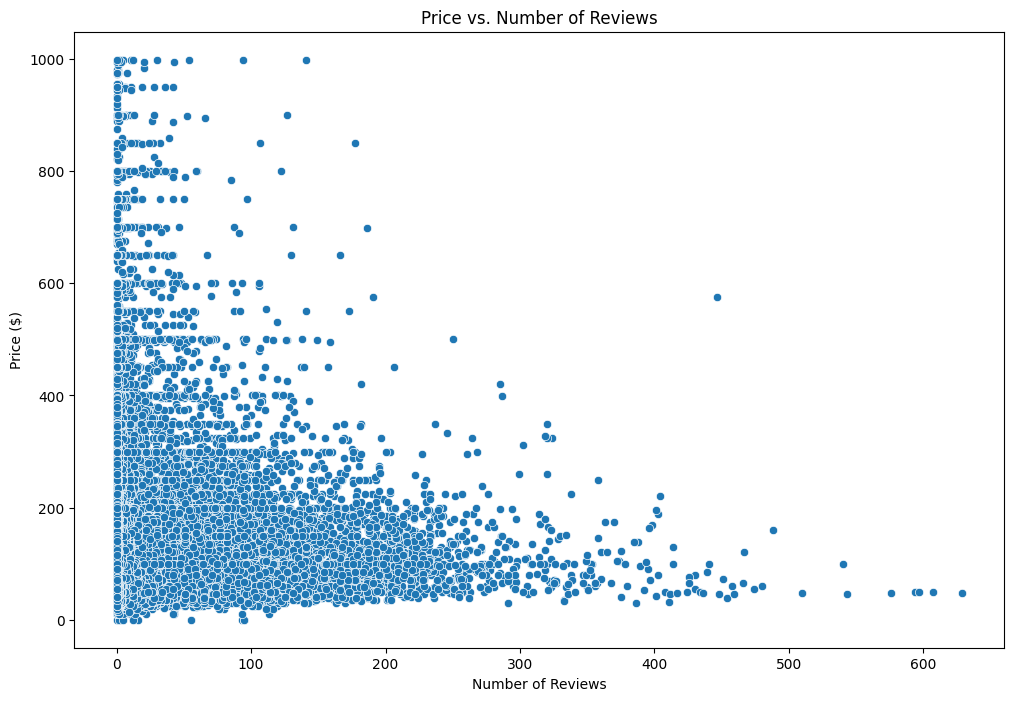

In [33]:
# Create a scatter plot of price vs number_of_reviews
plt.figure(figsize=(12, 8))
sns.scatterplot(x='number_of_reviews', y='price', data=df_clean)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

In [34]:
# Save the cleaned dataframe to a new CSV file
df_clean.to_csv('cleaned_airbnb_data.csv', index=False)

In [35]:
numeric_df = df_clean.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the matrix
print(correlation_matrix)

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588210 -0.002999   0.091016   
host_id                         0.588210  1.000000  0.020426   0.127750   
latitude                       -0.002999  0.020426  1.000000   0.084630   
longitude                       0.091016  0.127750  0.084630   1.000000   
price                           0.025297  0.035814  0.063743  -0.264635   
minimum_nights                 -0.014462 -0.018500  0.025191  -0.064081   
number_of_reviews              -0.320780 -0.140527 -0.015347   0.058252   
reviews_per_month               0.180416  0.210108 -0.018610   0.137665   
calculated_host_listings_count  0.133819  0.155536  0.019515  -0.115530   
availability_365                0.085079  0.205147 -0.011061   0.084830   

                                   price  minimum_nights  number_of_reviews  \
id                              0.025297       -0.014462          -0.320780   
host_id         

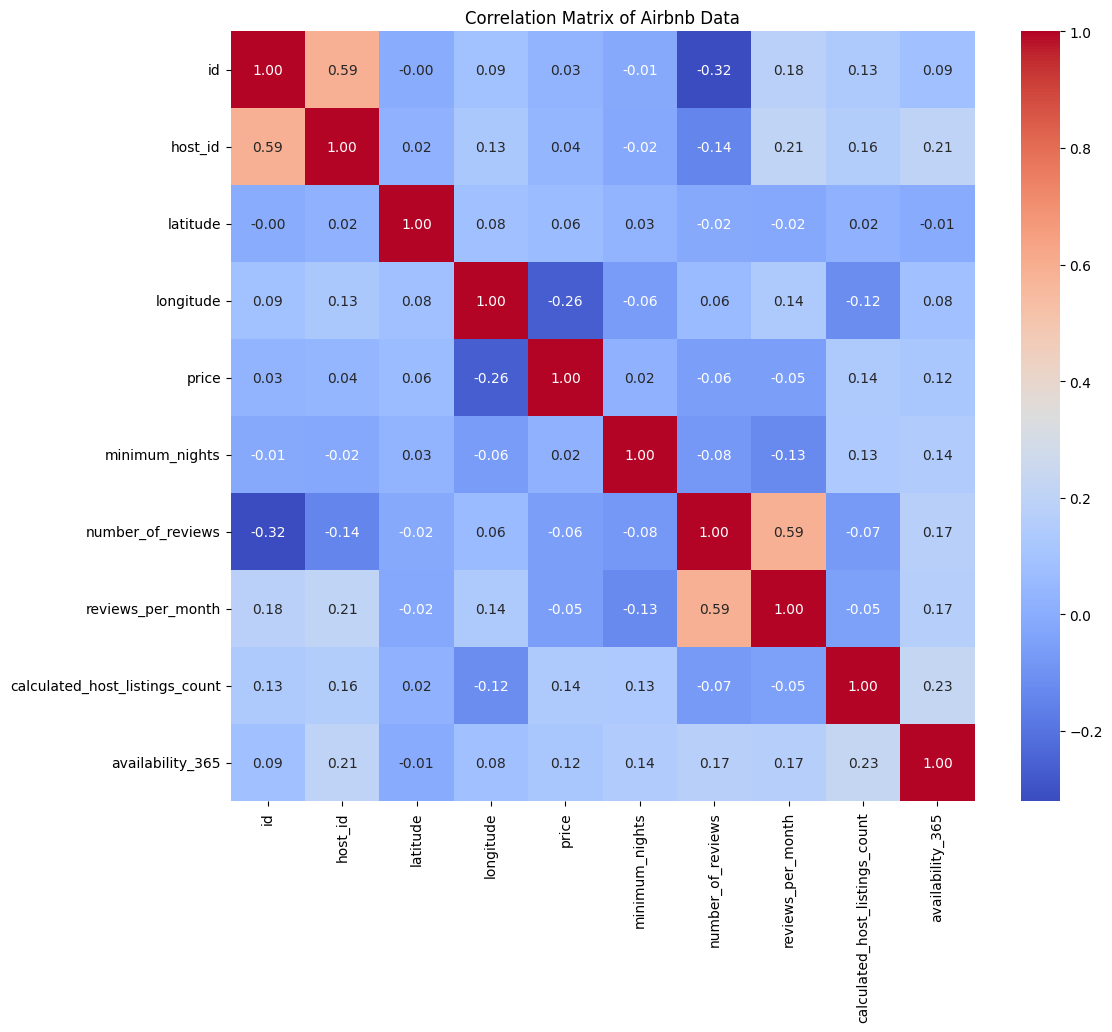

In [36]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Airbnb Data')
plt.show()